### Análisis de industrias creativas 2020

Recientemente la Secretaría de Cultura del Estado de Hidalgo, recibió una invitación para participar en la Convocatoria Internacional 

In [1]:
#Carga de paquetería 

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gp
import numpy as np

In [2]:
#Lectura del archivo. 
denuehgo = pd.read_csv('denue_inegi_13_.csv', low_memory = False, encoding='iso-8859-1')

In [3]:
#Impresión de los datos iniciales 
denuehgo.head()

,id,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,nom_v_e_1,...,localidad,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta
0,6170563,AC EL SUSPIRO,AC EL SUSPIRO SC,112512,"Piscicultura y otra acuicultura, excepto camar...",0 a 5 personas,CARRETERA,NINGUNO,OTRO (ESPECIFIQUE),NINGUNO,...,El Suspiro,0038,800,7714047644,NaN,NaN,Fijo,21.056730,-98.557597,2010-07
1,6170601,ACHIQUIHUISTLA SPR DE RL,ACHIQUIHUISTLA SPR DE RL,112512,"Piscicultura y otra acuicultura, excepto camar...",6 a 10 personas,OTRO (ESPECIFIQUE),NINGUNO,OTRO (ESPECIFIQUE),NINGUNO,...,Teocoahuitl Tetsintla,004A,800,7713459117,NaN,NaN,Fijo,20.994804,-98.338178,2010-07
2,8161670,ACUICOLA LOS TULES,ACUICOLA LOS TULES SC DE RL DE CV,112512,"Piscicultura y otra acuicultura, excepto camar...",0 a 5 personas,CALLE,san anitonio,CALLE,san martín,...,San Juan Hueyapan,0205,4,NaN,NaN,NaN,Fijo,20.028649,-98.280288,2019-11
3,6170498,ACUICOLA TULTITLÁN,NaN,112512,"Piscicultura y otra acuicultura, excepto camar...",6 a 10 personas,OTRO (ESPECIFIQUE),NINGUNO,CALLE,NINGUNO,...,Tultitlán,0045,18,7711757581,SIXTO.HERNANDEZ_777@HOTMAIL.COM,NaN,Fijo,21.125764,-98.651444,2014-12
4,6170589,AGROECOLOGIA PRODUCTIVA EL JARDIN,AGROECOLOGIA PRODUCTIVA EL JARDIN SC DE RL DE CV,112512,"Piscicultura y otra acuicultura, excepto camar...",6 a 10 personas,CALLE,SIN REFERENCIA,CALLE,NINGUNO,...,Santa Catarina,0017,3,7751391077,NaN,NaN,Fijo,20.251117,-98.179232,2010-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139381,1583320,VOCALÍA EJECUTIVA,INSTITUTO NACIONAL ELECTORAL-INE,931210,Administración pública en general,0 a 5 personas,CALLE,LAZARO CARDENAS,CERRADA,CUARTA LAZARO CARDENAS,...,Ixmiquilpan,0219,1,7597232810,NaN,WWW.INE.MX,Fijo,20.475738,-99.224480,2014-12
139382,1583322,VOCALÍA SECRETARIAL,INSTITUTO NACIONAL ELECTORAL-INE,931210,Administración pública en general,6 a 10 personas,CALLE,LAZARO CARDENAS,CERRADA,CUARTA LAZARO CARDENAS,...,Ixmiquilpan,0219,1,7597232810,NaN,WWW.INE.MX,Fijo,20.475738,-99.224480,2010-07
139383,9025232,ZONA DE TRANSMISION VALLE DE MEXICO CENTRO ORI...,CFE TRANSMISION,931310,Regulación y fomento del desarrollo económico,101 a 250 personas,AVENIDA,VICENTE GUERRERO,OTRO (ESPECIFIQUE),NINGUNO,...,Nuevo Centro de Población Agrícola el Chacón,0577,40,NaN,NaN,WWW.CFEMEX.COM,Fijo,20.063963,-98.732276,2019-11
139384,8240232,ZONA ESCOLAR 063,SECRETARIA DE EDUCAION PUBLICA,931610,Actividades administrativas de instituciones d...,0 a 5 personas,AVENIDA,INDEPENDENCIA,AVENIDA,FRANCISCO I. MADERO,...,San Agustín Tlaxiaca,0288,22,NaN,NaN,NaN,Fijo,20.115206,-98.886851,2019-11


In [4]:
#Aquí se puede ver el total de datos y columnas que tenemos. La base esta compuesta 
#por 139,386 filas de las cuales la primera es una columna de titulo por lo que se cuenta 
#con 139,385 registros que corresponden a unidades económicas y 41 columnas.
denuehgo.shape

(139386, 41)

In [5]:
#Como podemos ver aquí, se tiene la base completa de todas las unidades económicas 
#del estado de Hidalgo. 
denuehgo.nombre_act.value_counts()[:10]

Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas    14432
Salones y clínicas de belleza y peluquerías                                   5160
Elaboración de tortillas de maíz y molienda de nixtamal                       4435
Restaurantes con servicio de preparación de antojitos                         4214
Comercio al por menor de ropa, excepto de bebé y lencería                     3971
Comercio al por menor de artículos de papelería                               3763
Restaurantes con servicio de preparación de tacos y tortas                    2504
Comercio al por menor de carne de aves                                        2501
Restaurantes que preparan otro tipo de alimentos para llevar                  2383
Comercio al por menor de frutas y verduras frescas                            2371
Name: nombre_act, dtype: int64

In [6]:
denuehgo.columns

Index(['id', 'nom_estab', 'raz_social', 'codigo_act', 'nombre_act', 'per_ocu',
       'tipo_vial', 'nom_vial', 'tipo_v_e_1', 'nom_v_e_1', 'tipo_v_e_2',
       'nom_v_e_2', 'tipo_v_e_3', 'nom_v_e_3', 'numero_ext', 'letra_ext',
       'edificio', 'edificio_e', 'numero_int', 'letra_int', 'tipo_asent',
       'nomb_asent', 'tipoCenCom', 'nom_CenCom', 'num_local', 'cod_postal',
       'cve_ent', 'entidad', 'cve_mun', 'municipio', 'cve_loc', 'localidad',
       'ageb', 'manzana', 'telefono', 'correoelec', 'www', 'tipoUniEco',
       'latitud', 'longitud', 'fecha_alta'],
      dtype='object')

In [7]:
#Se hizo uno clasificación anterior para ver 
#las empresas que de acuerdo al SCIAN para identificar cuales se 
#alinean a las industrias creativas.
siancreativas= pd.read_csv('claves sian.csv')
siancreativas

,code_en,sector_spanish,code_es,sector_english,creative_nesta_2016,creative_refined,creative_sector,has_creative,code_int
0,3279,Fabricación de otros productos a base de miner...,3279,Other nonmetallic mineral products manufacturingT,1.0,1.0,crafts,1,3279
1,32791,Fabricación de productos abrasivosT,32791,Abrasive products manufacturingT,1.0,1.0,crafts,1,32791
2,327910,Fabricación de productos abrasivos,327910,Abrasive products manufacturing,1.0,1.0,crafts,1,327910
3,32799,Fabricación de otros productos a base de miner...,32799,Other nonmetallic mineral products manufacturingT,1.0,1.0,crafts,1,32799
4,327991,Fabricación de productos a base de piedras de ...,327991,Manufacturing of products based on quarry stone,1.0,1.0,crafts,1,327991
...,...,...,...,...,...,...,...,...,...
191,8129,Servicios de revelado e impresión de fotografí...,8129,Photograph developing and printing and other p...,1.0,1.0,publishing,1,8129
192,81291,Servicios de revelado e impresión de fotografías,81291,Photograph developing and printing services,1.0,1.0,publishing,1,81291
193,812910,Servicios de revelado e impresión de fotografías,812910,Photograph developing and printing services,1.0,1.0,publishing,1,812910
194,81299,Otros servicios personales,81299,Other personal services,1.0,1.0,publishing,1,81299


In [8]:
#Dado que la clasificación es de América del Norte se cuenta con datos en español e Ingles
#contando que la primera fila, se cuentan con 195 códigos que corresponden a industrias 
#creativas. 
siancreativas.shape

(196, 9)

In [9]:
#Para poder filtrar las tablas, se genera una lista que permita comparar los valores en 
#columnas de codigo_act que corresponde a los códigos de actividad del SCIAN y code_es 
#codigo SCIAN que corresponde solo a las industrias creativas. 
cod= siancreativas.code_es.to_list()
cod

[3279,
 32791,
 327910,
 32799,
 327991,
 327999,
 339911,
 339912,
 339913,
 339914,
 33992,
 339920,
 33993,
 339930,
 51111,
 511111,
 511112,
 51112,
 511121,
 511122,
 51113,
 511131,
 511132,
 51114,
 511141,
 511142,
 51119,
 511191,
 511192,
 5112,
 51121,
 511210,
 512,
 5121,
 51211,
 512111,
 512112,
 512113,
 51212,
 512120,
 51213,
 512130,
 51219,
 512190,
 5122,
 51221,
 512210,
 51222,
 512220,
 51223,
 512230,
 51224,
 512240,
 51229,
 512290,
 515,
 5151,
 51511,
 515110,
 51512,
 515120,
 5152,
 51521,
 515210,
 518,
 5182,
 51821,
 518210,
 51912,
 519121,
 519122,
 51913,
 519130,
 51919,
 519190,
 5413,
 54131,
 541310,
 54132,
 541320,
 54133,
 541330,
 54134,
 541340,
 54135,
 541350,
 54136,
 541360,
 54137,
 541370,
 54138,
 541380,
 5414,
 54141,
 541410,
 54142,
 541420,
 54143,
 541430,
 54149,
 541490,
 5415,
 54151,
 541510,
 5416,
 54161,
 541610,
 54162,
 541620,
 54169,
 541690,
 5418,
 54181,
 541810,
 54182,
 541820,
 54183,
 541830,
 54184,
 541840,

In [10]:
#Para saber cuantas unidades económicas corresponden a las industrias creativas y 
#culturales de donde obtuvimos que solo 2,385 unidades economicas correspondian a los 
#códigos. 
codcheck=denuehgo.codigo_act.isin(cod)
print (codcheck.value_counts())

False    137001
True       2385
Name: codigo_act, dtype: int64


In [11]:
denuehgo_filt = denuehgo[codcheck]
denuehgo_filt

,id,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,nom_v_e_1,...,localidad,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta
11186,9331027,ALMICON,ALMICON SA DE CV,327991,Fabricación de productos a base de piedras de ...,11 a 30 personas,CARRETERA,ATOTONILCO TEXAS,AVENIDA,DEL TRABAJO,...,La Lagunilla,003A,800,NaN,CONTABILIDAD@CEMIX.COM,WWW.CEMIX.COM,Fijo,20.025769,-99.207544,2020-11
11187,1621083,AMBRIZ MARMOLES,NaN,327991,Fabricación de productos a base de piedras de ...,0 a 5 personas,AVENIDA,GUANAJUATO BOULEVARD DEL MINERO,CALLE,HIDALGO,...,Pachuca de Soto,2135,14,NaN,NaN,NaN,Fijo,20.124857,-98.759627,2010-07
11227,7087721,ARTESANIAS DE PIEDRA,NaN,327991,Fabricación de productos a base de piedras de ...,0 a 5 personas,CALLE,PIRAMIDE,CALLE,OBSIDIANA,...,Tula de Allende,0379,30,NaN,NaN,NaN,Fijo,20.061097,-99.345442,2019-11
11237,1540961,ARTESANIAS JAGUAR,NaN,327991,Fabricación de productos a base de piedras de ...,0 a 5 personas,CALLE,JAGUARES,CALLE,OBSIDIANA,...,Tula de Allende,0379,30,7731295477,ARTENOEMM@GMAIL.COM,NaN,Fijo,20.061418,-99.345133,2010-07
11293,1566510,BEXEL SUCURSAL TULA,BEXEL INTERNACIONAL SA DE CV,327999,Fabricación de otros productos a base de miner...,11 a 30 personas,CALLE,TULA-TEPEJI (AVENIDA UNIVERSIDAD),NaN,NINGUNO,...,San Marcos,0059,61,NaN,CESAR.MIRELES@BEXEL.COM,WWW.BEXEL.MX,Fijo,20.032469,-99.344142,2010-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136842,7871628,VETERINARIA MI MASCOTA Y YO,NaN,812990,Otros servicios personales,0 a 5 personas,CALLE,MANGANESO,CALLE,NINGUNO,...,Pachuca de Soto,2915,5,77129001535,NaN,NaN,Fijo,20.056927,-98.796826,2019-11
136843,1547926,VETERINARIA Y ESTETICA CANINA,NaN,812990,Otros servicios personales,0 a 5 personas,AVENIDA,BENITO JUAREZ,CERRADA,GUADALUPE,...,Mineral del Monte,0074,42,7711125933,NaN,NaN,Fijo,20.136059,-98.677281,2014-12
137475,1553065,WAU PARA TU MASCOTA. ESTETICA CANINA,NaN,812990,Otros servicios personales,0 a 5 personas,BOULEVARD,NARCISO MENDOZA,CALLE,RAYON PONIENTE,...,Tulancingo,0588,27,NaN,NaN,NaN,Fijo,20.089791,-98.374587,2014-12
137494,7205635,YO AMO MI MASKOTA,NaN,812990,Otros servicios personales,0 a 5 personas,CALLE,FRESNOS,CALLE,ARCES,...,El Pedregal de San José,0179,23,7757070120,ROBERTO_MCIN@YAHOO.COM.MX,NaN,Fijo,20.068153,-98.411559,2019-11


In [12]:
denuehgo_filtact=denuehgo_filt[['nombre_act','codigo_act', 'municipio', 'latitud', 'longitud']]
denuehgo_filtact

,nombre_act,codigo_act,municipio,latitud,longitud
11186,Fabricación de productos a base de piedras de ...,327991,Atotonilco de Tula,20.025769,-99.207544
11187,Fabricación de productos a base de piedras de ...,327991,Pachuca de Soto,20.124857,-98.759627
11227,Fabricación de productos a base de piedras de ...,327991,Tula de Allende,20.061097,-99.345442
11237,Fabricación de productos a base de piedras de ...,327991,Tula de Allende,20.061418,-99.345133
11293,Fabricación de otros productos a base de miner...,327999,Tula de Allende,20.032469,-99.344142
...,...,...,...,...,...
136842,Otros servicios personales,812990,Pachuca de Soto,20.056927,-98.796826
136843,Otros servicios personales,812990,Mineral del Monte,20.136059,-98.677281
137475,Otros servicios personales,812990,Tulancingo de Bravo,20.089791,-98.374587
137494,Otros servicios personales,812990,Santiago Tulantepec de Lugo Guerrero,20.068153,-98.411559


In [13]:
df_count = denuehgo_filtact.groupby(['municipio','nombre_act']).count()
df_count

codigo_act  \
municipio    nombre_act                                                       
Acatlán      Bibliotecas y archivos del sector público                    1   
             Servicios de fotografía y videograbación                     3   
             Transmisión de programas de radio                            1   
Acaxochitlán Agencias de publicidad                                       1   
             Bibliotecas y archivos del sector público                    1   
...                                                                     ...   
Zimapán      Otros servicios personales                                   1   
             Promotores del sector público de espectáculos a...           4   
             Servicios de fotografía y videograbación                     6   
             Servicios de profesores particulares                         1   
             Transmisión de programas de radio                            1   

                                                                 latitud  \
municipio    nombre_act                                                    
Acatlán      Bibliotecas y archivos del sector público                 1   
             Servicios de fotografía y videograbación                  3   
             Transmisión de programas de radio                         1   
Acaxochitlán Agencias de publicidad                                    1   
             Bibliotecas y archivos del sector público                 1   
...                                                                  ...   
Zimapán      Otros servicios personales                                1   
             Promotores del sector público de espectáculos a...        4   
             Servicios de fotografía y videograbación                  6   
             Servicios de profesores particulares                      1   
             Transmisión de programas de radio                         1   

                                                                 longitud  
municipio    nombre_act                                                    
Acatlán      Bibliotecas y archivos del sector público                  1  
             Servicios de fotografía y videograbación                   3  
             Transmisión de programas de radio                          1  
Acaxochitlán Agencias de publicidad                                     1  
             Bibliotecas y archivos del sector público                  1  
...                                                                   ...  
Zimapán      Otros servicios personales                                 1  
             Promotores del sector público de espectáculos a...         4  
             Servicios de fotografía y videograbación                   6  
             Servicios de profesores particulares                       1  
             Transmisión de programas de radio                          1  

[812 rows x 3 columns]

In [14]:
df_reshaped = df_count.reset_index(level='municipio').rename(columns={'codigo_act': 'Total'})
df_reshaped

,municipio,Total,latitud,longitud
nombre_act,,,,
Bibliotecas y archivos del sector público,Acatlán,1,1,1
Servicios de fotografía y videograbación,Acatlán,3,3,3
Transmisión de programas de radio,Acatlán,1,1,1
Agencias de publicidad,Acaxochitlán,1,1,1
Bibliotecas y archivos del sector público,Acaxochitlán,1,1,1
...,...,...,...,...
Otros servicios personales,Zimapán,1,1,1
"Promotores del sector público de espectáculos artísticos, culturales, deportivos y similares que cuentan con instalaciones para presentarlos",Zimapán,4,4,4
Servicios de fotografía y videograbación,Zimapán,6,6,6


In [15]:
df_reshaped = df_reshaped[['municipio', 'Total']]
df_reshaped

,municipio,Total
nombre_act,,
Bibliotecas y archivos del sector público,Acatlán,1
Servicios de fotografía y videograbación,Acatlán,3
Transmisión de programas de radio,Acatlán,1
Agencias de publicidad,Acaxochitlán,1
Bibliotecas y archivos del sector público,Acaxochitlán,1
...,...,...
Otros servicios personales,Zimapán,1
"Promotores del sector público de espectáculos artísticos, culturales, deportivos y similares que cuentan con instalaciones para presentarlos",Zimapán,4
Servicios de fotografía y videograbación,Zimapán,6


In [16]:
#pd.set_option('display.max_rows', None)
df_mun = df_reshaped.groupby(['municipio']).count()
df_mun

,Total
municipio,
Acatlán,3
Acaxochitlán,8
Actopan,24
Agua Blanca de Iturbide,6
Ajacuba,7
...,...
Yahualica,4
Zacualtipán de Ángeles,14
Zapotlán de Juárez,10


In [17]:
print(df_mun.describe())

           Total
count  83.000000
mean    9.783133
std    10.471853
min     1.000000
25%     3.000000
50%     6.000000
75%    12.500000
max    60.000000


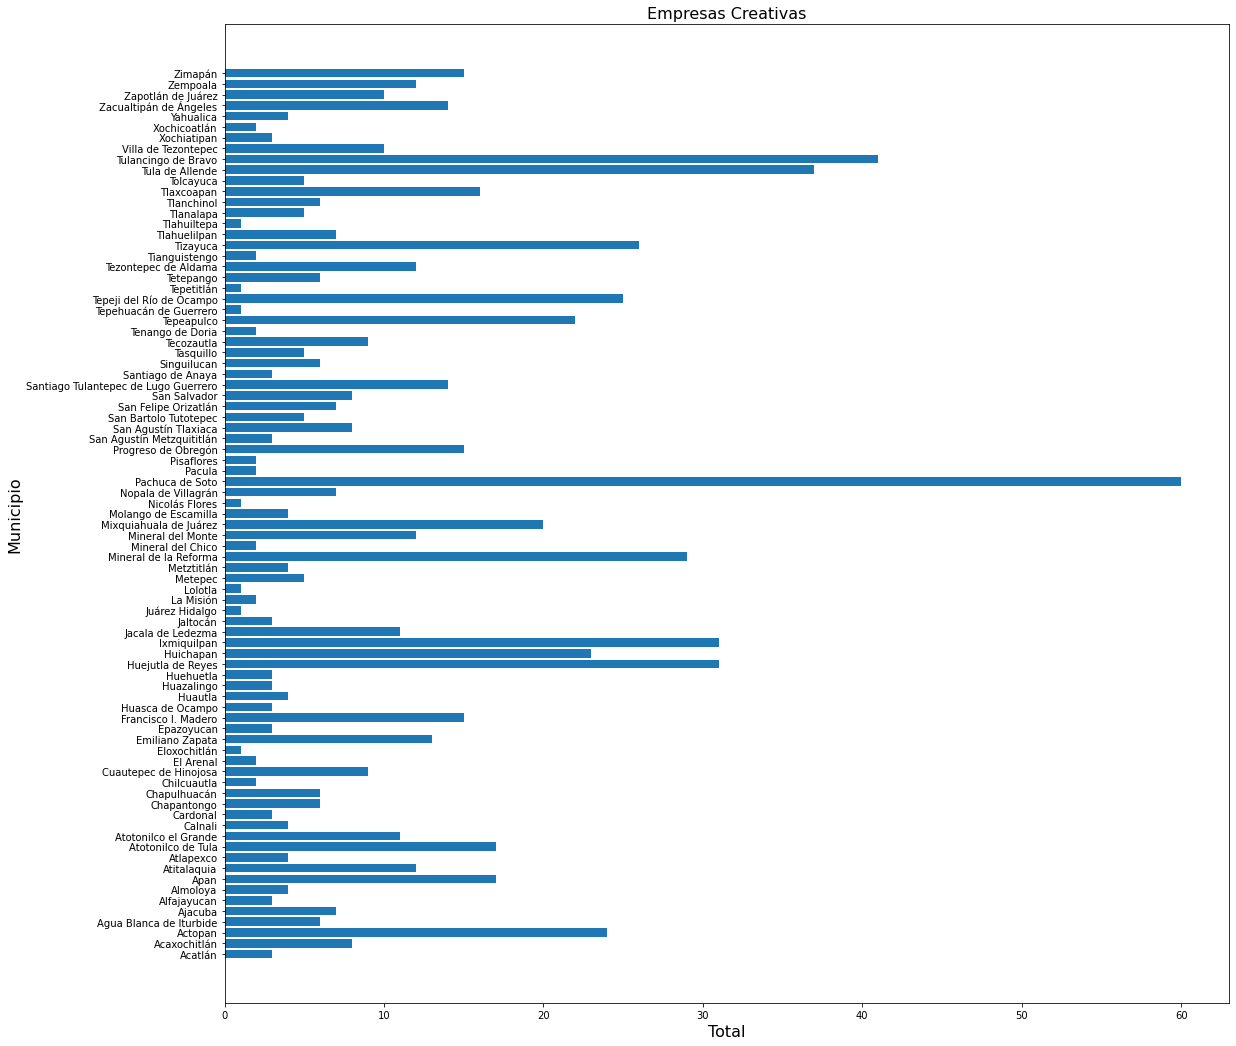

In [18]:
Allmun=df_mun.index
creativempresas=df_mun['Total']
fig = plt.figure(figsize=(18, 18))
ax = fig.add_subplot(111)
ax.grid()
ax.set_xlabel('Total', fontsize=16)
ax.set_ylabel('Municipio', fontsize=16)
ax.set_title('Empresas Creativas', fontsize=16)

plt.barh(Allmun, creativempresas)

plt.grid()
plt.show()

In [19]:
denue13_creative = pd.merge(denuehgo_filt,siancreativas,left_on='codigo_act',
                            right_on='code_int',how='left')
denue13_creative.head()

,id,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,nom_v_e_1,...,fecha_alta,code_en,sector_spanish,code_es,sector_english,creative_nesta_2016,creative_refined,creative_sector,has_creative,code_int
0,9331027,ALMICON,ALMICON SA DE CV,327991,Fabricación de productos a base de piedras de ...,11 a 30 personas,CARRETERA,ATOTONILCO TEXAS,AVENIDA,DEL TRABAJO,...,2020-11,327991,Fabricación de productos a base de piedras de ...,327991,Manufacturing of products based on quarry stone,1.0,1.0,crafts,1,327991
1,1621083,AMBRIZ MARMOLES,NaN,327991,Fabricación de productos a base de piedras de ...,0 a 5 personas,AVENIDA,GUANAJUATO BOULEVARD DEL MINERO,CALLE,HIDALGO,...,2010-07,327991,Fabricación de productos a base de piedras de ...,327991,Manufacturing of products based on quarry stone,1.0,1.0,crafts,1,327991
2,7087721,ARTESANIAS DE PIEDRA,NaN,327991,Fabricación de productos a base de piedras de ...,0 a 5 personas,CALLE,PIRAMIDE,CALLE,OBSIDIANA,...,2019-11,327991,Fabricación de productos a base de piedras de ...,327991,Manufacturing of products based on quarry stone,1.0,1.0,crafts,1,327991
3,1540961,ARTESANIAS JAGUAR,NaN,327991,Fabricación de productos a base de piedras de ...,0 a 5 personas,CALLE,JAGUARES,CALLE,OBSIDIANA,...,2010-07,327991,Fabricación de productos a base de piedras de ...,327991,Manufacturing of products based on quarry stone,1.0,1.0,crafts,1,327991
4,1566510,BEXEL SUCURSAL TULA,BEXEL INTERNACIONAL SA DE CV,327999,Fabricación de otros productos a base de miner...,11 a 30 personas,CALLE,TULA-TEPEJI (AVENIDA UNIVERSIDAD),NaN,NINGUNO,...,2010-07,327999,Fabricación de otros productos a base de miner...,327999,Other nonmetallic mineral products manufacturing,1.0,1.0,crafts,1,327999


In [20]:
dfsector= denue13_creative[['codigo_act','municipio','creative_sector']]
dfsector.head()

,codigo_act,municipio,creative_sector
0,327991,Atotonilco de Tula,crafts
1,327991,Pachuca de Soto,crafts
2,327991,Tula de Allende,crafts
3,327991,Tula de Allende,crafts
4,327999,Tula de Allende,crafts


In [21]:
df_count3 = dfsector.groupby(['municipio','creative_sector']).count()
df_count3.head()

codigo_act
municipio    creative_sector                  
Acatlán      film_radio_tv                   1
             libraries_museums               1
             publishing                      3
Acaxochitlán advertising_marketing           2
             crafts                          1

In [22]:
df_count4 = dfsector.groupby(['creative_sector']).count()
df_count4

,codigo_act,municipio
creative_sector,,
advertising_marketing,337,337
architecture,140,140
crafts,156,156
design,126,126
film_radio_tv,72,72
libraries_museums,205,205
music_performing_arts,780,780
publishing,534,534
software,35,35


In [23]:
industriashgo = df_count4.reset_index(level='creative_sector').rename(columns={'codigo_act': 'Total'})[['creative_sector', 'Total']]
industriashgo

,creative_sector,Total
0,advertising_marketing,337
1,architecture,140
2,crafts,156
3,design,126
4,film_radio_tv,72
5,libraries_museums,205
6,music_performing_arts,780
7,publishing,534
8,software,35


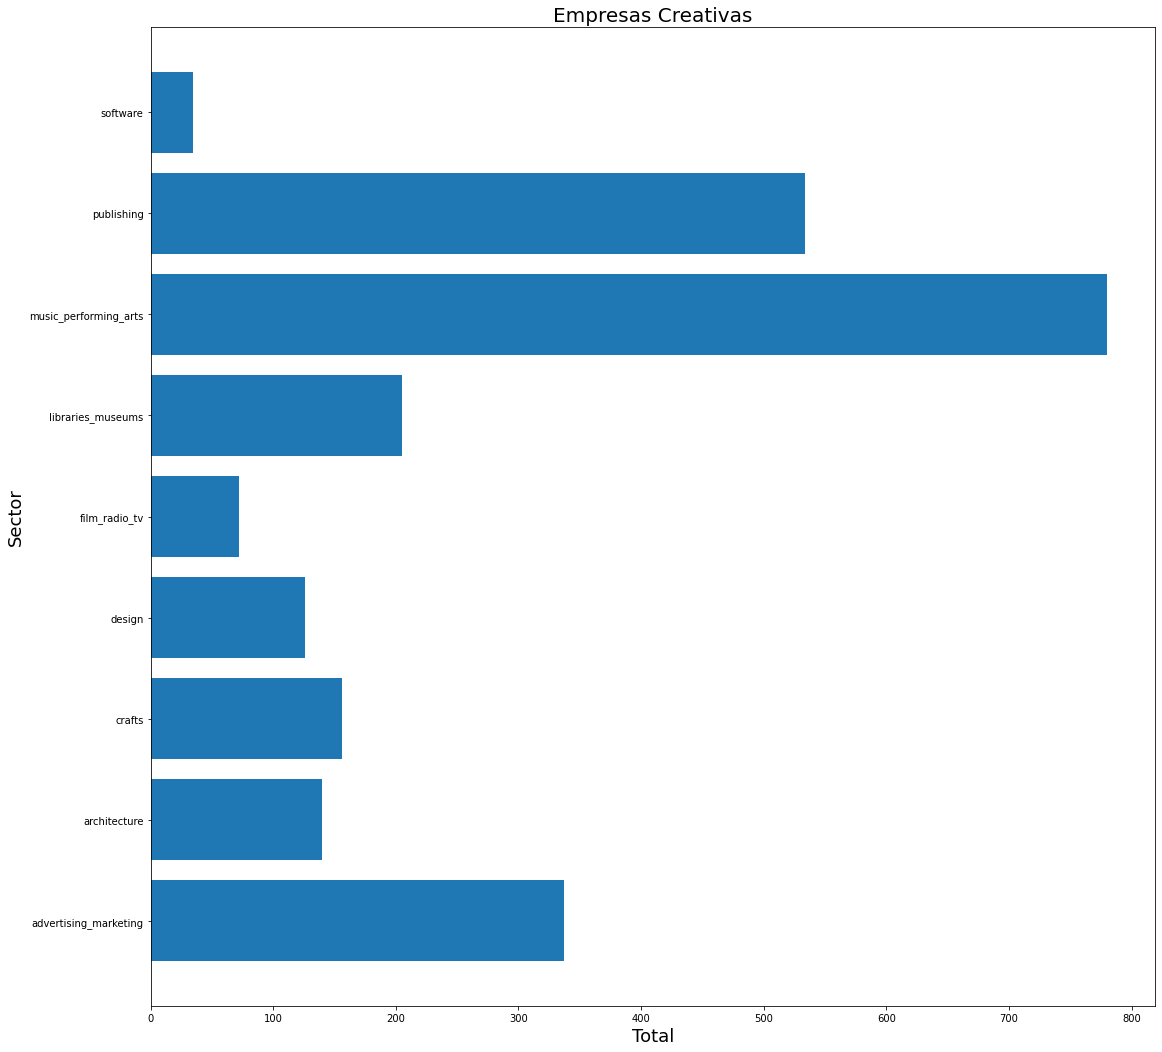

In [24]:
creativesector=df_count4.index
creativempresas1=industriashgo['Total']
fig = plt.figure(figsize=(18, 18))
ax = fig.add_subplot(111)
ax.grid()
ax.set_xlabel('Total', fontsize=18)
ax.set_ylabel('Sector', fontsize=18)
ax.set_title('Empresas Creativas', fontsize=20)

plt.barh(creativesector, creativempresas1)

plt.grid()
plt.show()

Text(0.5, 1.0, 'Hidalgo')

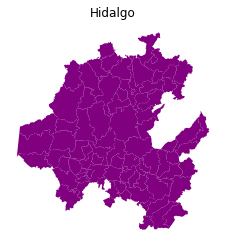

In [36]:
carta = gp.read_file('hgo_municipio.shp')
plt = carta.plot(facecolor='purple')
plt.axis('off')
plt.set_title('Hidalgo')